# 3. Data analyse

In dit deel van de workshop doen we een stukje 'participatory live coding'. Hierin ga ik een aantal aspecten van programmeren in Python en het analyseren van data in Pandas uitleggen. Tijdens de uitleg kun je meetypen en zien wat de uitkomsten van een bewerking zijn. Doordat we Notebooks gebruiken maak je hierdoor ook meteen je eigen referentiemateriaal.

## Python

In dit stuk gaan we gebruik maken van Python omdat het een veelgebruikte programmeertaal is binnen onderzoek. Het is een programmertaal voor algemene doeleinden die door de pakketten die mensen (veelal vrijwilligers) hebben gemaakt ook uitermate geschikt is voor het verwerken van gegevens. Voor de mensen die bekend zijn met programmeren, maar niet met Python (bestaan die nog): het is een interpreted, dynamically en strongly typed taal.

Een groot voordeel voor onderzoekers is dat het gratis, vrij, en open source is. Je kan het tevens gebruiken op Windows, MacOS, en Linux. In het verleden vertrouwden veel onderzoekers op propriëtaire software voor hun gegevensanalyse en automatiseringstaken. Deze software was echter niet altijd beschikbaar voor studenten, andere onderzoekers, of bedrijven. Dit schaadt de reproduceerbaarheid en toepasbaarheid van de wetenschap. Onderzoekers zouden hun code moeten kunnen delen en de resultaten van andere onderzoekers moeten kunnen verifiëren zonder afhankelijk te zijn van propriëtaire en dure software.

Dankzij de duidelijke, gemakkelijk te lezen en consistente syntaxis is het gemakkelijk te leren. Er wordt veel nadruk gelegd op de leesbaarheid van de code, gebruikers worden gedwongen om witregels/spaties te gebruiken, er zijn geen haakjes en er zijn woorden waar andere talen symbolen zouden gebruiken:

```python
# Python implementation of "Hello world!"
print("Hello world")
```

```java
// "Hello world" in Java
public static void main(String[] args) {
    System.out.println("Hello world!");
}
```

Het is eenvoudig om de functionaliteit van Python uit te breiden en extra pakketten te downloaden (of te publiceren). De Python Package Index bevat momenteel meer dan 250.000 pakketten. Als gevolg hiervan kan het met deze pakketten vrijwel alles doen en wordt het veel gebruikt voor:

- Websites ontwikkelen (bij. Django, Flask)
- Het maken van grafische interfaces (bijv. Pyside2, Tkinter, PySimpleGUI)
- Games ontwikkelen (bijv. pygame)
- Automatiseren
- Snel ontwikkelen van prototypes (bijv. pyqtgraph)
- Web scraping (bijv. Scrapy, BeautifulSoup, Selenium)
- Data analyse (bijv. Numpy en Pandas)
- Machine learning and neural networks (bijv. Scikit-learn, Keras)

## Python Basics

Het gaat in dit kwartiertje natuurlijk niet lukken om heel Python en de wetenschappelijke pakketten door te nemen. Daarom nemen we een paar basis dingen door en kijken we naar wat geavanceerdere opties.

### Rekenen

Het rekenen werkt wel ongeveer hoe je het verwacht:

In [1]:
1 + 1

2

In [2]:
15 - 10

5

In [3]:
5 * 5

25

Wat hetzelfde is als 5 tot de 2e macht. Voor machtsheffen gebruikt Python `**`:

In [4]:
5**2

25

Als we een integer delen krijgen we een komma getal (float):

In [5]:
10 / 3

3.3333333333333335

In [6]:
type(3)

int

In [7]:
type(3.33)

float

Voor integer devision kan je `//` gebruiken:

In [8]:
10 // 3

3

Ten slotte is er modulo, dit wordt ook wel restdeling genoemd. Het geeft je de rest nadat je een getal deelt door een ander getal:
::::::{margin}
:::{note}
Het stuk achter de `#` is een comment. Die kunnen gebruikt worden ter verduidelijking van een stuk code
:::
::::::

In [9]:
10 % 3  # 10 / 3 = 9, 10 - 9 = 1

1

Modulo lijkt misschien een beetje vreemd, maar het is eigenlijk best handig. Een klassiek voorbeeld van hoe modulo kan worden gebruikt, is om uit te zoeken of een getal (uitkomst is 0) even of oneven is (uitkomst is niet 0).

:::{admonition} Opdracht
Je wilt de BMI van een van je deelnemers berekenen. Hun lengte is 1.90 m en hun gewicht is 95 kg. Bedenk dat de formule voor BMI massa gedeeld door lengte in het kwadraat is.
:::

Om het antwoord te weergeven kan je klikken op "> Click to show".

In [10]:
95.0 / 1.90**2

26.315789473684212

### Variabelen

In Python kunnen we waarden toewijzen aan een variabelen met het `=` symbool.

:::{figure} ../figures/variable_assignment1.png
:width: 50%
:::

In [11]:
height = 1.90  # lengte van patiënt in meters
height

1.9

:::{admonition} Opdracht
Doe hetzelfde als voorheen, maar maak eerst een variabele lengte en gewicht aan voordat je de BMI berekend. Wat is hier het voordeel van?
:::

Om het antwoord te weergeven kan je klikken op "> Click to show".

In [12]:
lengte = 1.90  # meters
gewicht = 95.0  # kg
bmi = gewicht / lengte ** 2
bmi

26.315789473684212

## Python voor onderzoek

Zoals eerder gezegd ligt de echte kracht van Python in het rijke ecosysteem van pakketten die het in staat stelt om nieuwe taken te vervullen. Voor onderzoek zijn er een aantal pakketten die veel terugkomen en de basis vormen voor het ecosysteem. 

:::{figure} ../figures/scientific-ecosystem.png
:::

In [13]:
import numpy as np  # functies uit het numpy pakket met alias np

### Snelheid

Als we de snelheid van Python (bovenste) vergelijken met Python+Numpy (onderste) dan zie je dat Numpy echt een heel stuk snell is.

In [14]:
timeit_list = list(range(10000))

%timeit [i**2 for i in timeit_list]

2.4 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
timeit_array = np.arange(10000)

%timeit timeit_array**2

3.9 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Gemak

Als we een lijst van waarden aanmaken in Python en iedere waarde willen vermenigvuldigen met twee gebeurd er iets onverwachts:

In [16]:
my_list = [0, 1, 2, 3, 4, 5]
my_list * 2

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]

Met numpy gaat dit een stuk makkelijker. Numpy maakt gebruik van **arrays** en deze maken gebruik van broadcasting:

In [17]:
array = np.arange(6)
array

array([0, 1, 2, 3, 4, 5])

In [18]:
array * 2

array([ 0,  2,  4,  6,  8, 10])

## Werken met data

Numpy is uitermate geschikt voor matrix rekenen, maar in praktijk werken veel onderzoekers met 2D spreadsheet data. Om met deze data te werken is het pakket **Pandas** ontwikkeld. Dit pakket bouwt voort op Numpy en biedt een aantal handige extra functionaliteiten voor het werken met spreadsheet data.

### Dataframes

In [19]:
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_formats = ["svg"]

In [20]:
df = sns.load_dataset("mpg", cache=False)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Beschrijven

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [22]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Converteren van miles per gallon naar kilometer per liter kan met de volgende formule:

$$km/L = mpg \times 0.425144$$

In [23]:
df["kml"] = df["mpg"] * 0.425144
df[["kml", "mpg"]].head()

,kml,mpg
0,7.652592,18.0
1,6.377160,15.0
2,7.652592,18.0
3,6.802304,16.0
4,7.227448,17.0


:::{admonition} Opdracht
Het gewicht staat ook nog in 'freedom units'. Maak een nieuwe kolom aan die heet `weight_kg` en reken het gewicht om.
:::
$$kg = lbs \times 0.4535924$$
Om het antwoord te weergeven kan je klikken op "> Click to show".

In [24]:
df["weight_kg"] = df["weight"] * 0.4535924
df[["weight", "weight_kg"]].head()

,weight,weight_kg
0,3504,1589.387770
1,3693,1675.116733
2,3436,1558.543486
3,3433,1557.182709
4,3449,1564.440188


### Groeperen

Het groeperen van data kan met de `groupby` method:

In [25]:
df.groupby("origin")["kml"].mean()

origin
europe    11.857874
japan     12.945904
usa        8.538394
Name: kml, dtype: float64

:::{admonition} Opdracht
Groepeer de data op de kolom `cylinders` en bereken het gemiddelde van `kml`.
:::

In [26]:
df.groupby("cylinders")["kml"].mean()

cylinders
3     8.736709
4    12.451092
5    11.634774
6     8.496807
8     6.361475
Name: kml, dtype: float64

### Visualisatie

Een andere krachtige manier om gevoel te krijgen voor je data is middels visualisatie. Seaborn is een plot pakket dat een hoge mate van abstractie geeft bij het maken van plots. In "niet-nerd-speak" betekent dit dat je weinig code nodig hebt voor mooie plots:

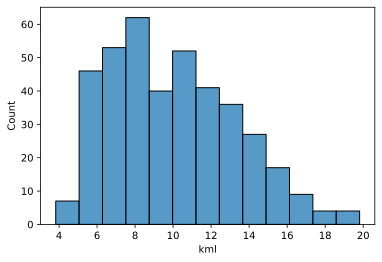

In [27]:
sns.histplot(x="kml", data=df);

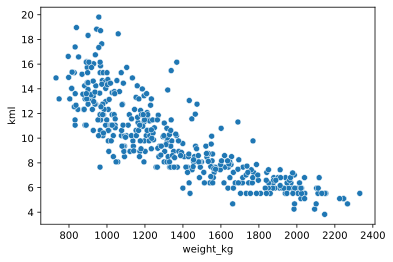

In [28]:
sns.scatterplot(x="weight_kg", y="kml", data=df);

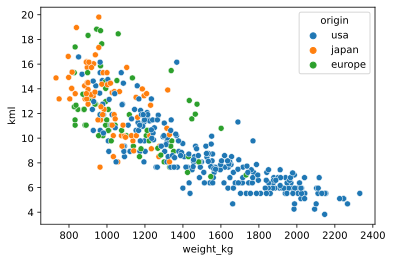

In [29]:
sns.scatterplot(x="weight_kg", y="kml", hue="origin", data=df);

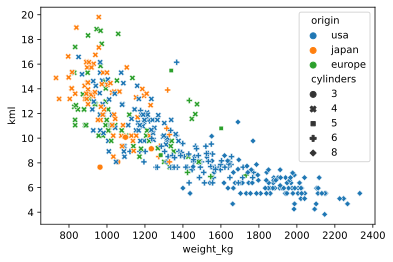

In [30]:
sns.scatterplot(x="weight_kg", y="kml", hue="origin", style="cylinders", data=df);

## Na de workshop

Als je na de workshop verder wilt met Python is het goed om een uitgebreidere tutorial en/of cursus te volgen. In een uur kan je maar een heel klein deel van de mogelijkheden doornemen. Een aantal aanraders zijn:

- https://automatetheboringstuff.com/
- https://wesmckinney.com/book/
- https://datacarpentry.org/python-ecology-lesson/
- https://jakevdp.github.io/PythonDataScienceHandbook/